# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Описание задачи:

Nomao - это инструмент для поиска различных локаций. Nomao собирает данные о различных местах из множества источников в интернете и аггрегирует их. Задача заключается в исключении дублирующихся мест, т.е. нужно понять, какие данные из разных источников говорят об одних и тех же местах.

Данные Nomao это сравнения описаний различных мест. Место описывается своими главными признаками: имя, адрес, геолокация, вебсайт, телефон, факс и т.д. В самом же датасете представлены метрики сравнения этих признаков между двумя точками

Пропущенные значения обозначаются через `?`.

Метки следующие: +1, если сравниваемые места это одно и то же место и -1, если сравниваемые места разные

Чек требований к датасету:
1. ~~Наличие пропущенных значений~~
2. ~~Разнородные признаки (например, один признак - зарплата, второй - марка автомобиля, а не все - интенсивности пикселей и т.п.)~~
3. ~~Несбалансированные классы (например, 90% объектов первого класса и 10% объектов второго класса)~~
4. Большое количество выбросов
5. Наличие текстовых признаков. Т.е. один из признаков - это произвольный текст, например, описание товара, аннотация к фильму и т.п.

# Загрузка данных

Имена столбцов не лежат отдельно, а представлены в файле с описанием данных. Для их извлечения я применил парсинг регулярными выражениями в Notepad++.

In [2]:
column_names = ['id',
'clean_name_intersect_min',
'clean_name_intersect_max',
'clean_name_levenshtein_sim',
'clean_name_trigram_sim',
'clean_name_levenshtein_term',
'clean_name_trigram_term',
'clean_name_including',
'clean_name_equality',
'city_intersect_min',
'city_intersect_max',
'city_levenshtein_sim',
'city_trigram_sim',
'city_levenshtein_term',
'city_trigram_term',
'city_including',
'city_equality',
'zip_intersect_min',
'zip_intersect_max',
'zip_levenshtein_sim',
'zip_trigram_sim',
'zip_levenshtein_term',
'zip_trigram_term',
'zip_including',
'zip_equality',
'street_intersect_min',
'street_intersect_max',
'street_levenshtein_sim',
'street_trigram_sim',
'street_levenshtein_term',
'street_trigram_term',
'street_including',
'street_equality',
'website_intersect_min',
'website_intersect_max',
'website_levenshtein_sim',
'website_trigram_sim',
'website_levenshtein_term',
'website_trigram_term',
'website_including',
'website_equality',
'countryname_intersect_min',
'countryname_intersect_max',
'countryname_levenshtein_sim',
'countryname_trigram_sim',
'countryname_levenshtein_term',
'countryname_trigram_term',
'countryname_including',
'countryname_equality',
'geocoderlocalityname_intersect_min',
'geocoderlocalityname_intersect_max',
'geocoderlocalityname_levenshtein_sim',
'geocoderlocalityname_trigram_sim',
'geocoderlocalityname_levenshtein_term',
'geocoderlocalityname_trigram_term',
'geocoderlocalityname_including',
'geocoderlocalityname_equality',
'geocoderinputaddress_intersect_min',
'geocoderinputaddress_intersect_max',
'geocoderinputaddress_levenshtein_sim',
'geocoderinputaddress_trigram_sim',
'geocoderinputaddress_levenshtein_term',
'geocoderinputaddress_trigram_term',
'geocoderinputaddress_including',
'geocoderinputaddress_equality',
'geocoderoutputaddress_intersect_min',
'geocoderoutputaddress_intersect_max',
'geocoderoutputaddress_levenshtein_sim',
'geocoderoutputaddress_trigram_sim',
'geocoderoutputaddress_levenshtein_term',
'geocoderoutputaddress_trigram_term',
'geocoderoutputaddress_including',
'geocoderoutputaddress_equality',
'geocoderpostalcodenumber_intersect_min',
'geocoderpostalcodenumber_intersect_max',
'geocoderpostalcodenumber_levenshtein_sim',
'geocoderpostalcodenumber_trigram_sim',
'geocoderpostalcodenumber_levenshtein_term',
'geocoderpostalcodenumber_trigram_term',
'geocoderpostalcodenumber_including',
'geocoderpostalcodenumber_equality',
'geocodercountrynamecode_intersect_min',
'geocodercountrynamecode_intersect_max',
'geocodercountrynamecode_levenshtein_sim',
'geocodercountrynamecode_trigram_sim',
'geocodercountrynamecode_levenshtein_term',
'geocodercountrynamecode_trigram_term',
'geocodercountrynamecode_including',
'geocodercountrynamecode_equality',
'phone_diff',
'phone_levenshtein',
'phone_trigram',
'phone_equality',
'fax_diff',
'fax_levenshtein',
'fax_trigram',
'fax_equality',
'street_number_diff',
'street_number_levenshtein',
'street_number_trigram',
'street_number_equality',
'geocode_coordinates_long_diff',
'geocode_coordinates_long_levenshtein',
'geocode_coordinates_long_trigram',
'geocode_coordinates_long_equality',
'geocode_coordinates_lat_diff',
'geocode_coordinates_lat_levenshtein',
'geocode_coordinates_lat_trigram',
'geocode_coordinates_lat_equality',
'coordinates_long_diff',
'coordinates_long_levenshtein',
'coordinates_long_trigram',
'coordinates_long_equality',
'coordinates_lat_diff',
'coordinates_lat_levenshtein',
'coordinates_lat_trigram',
'coordinates_lat_equality',
'geocode_coordinates_diff',
'coordinates_diff',
'label']

In [3]:
raw_data = pd.read_csv('Nomao.data', names=column_names)
raw_data = raw_data.drop(columns="id")

C:\Users\eglas\AppData\Local\Temp\ipykernel_17248\2884270137.py:1: DtypeWarning: Columns (57,58,59,60,61,62,65,66,67,68,69,70,101,102,103,105,106,107,117) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('Nomao.data', names=column_names)


In [4]:
raw_data.shape

(34465, 119)

Первые 5 строк:

In [5]:
raw_data.head()

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,clean_name_including,clean_name_equality,city_intersect_min,city_intersect_max,...,coordinates_long_levenshtein,coordinates_long_trigram,coordinates_long_equality,coordinates_lat_diff,coordinates_lat_levenshtein,coordinates_lat_trigram,coordinates_lat_equality,geocode_coordinates_diff,coordinates_diff,label
0,1.0,1.00,1.000000,1.000000,1.000000,1.000000,s,s,?,?,...,0.75,0.5,n,0.999953002209,0.777777777778,0.461538463831,n,1.0,0.999999996702,1
1,1.0,0.75,0.857143,0.857143,0.894737,0.947368,s,n,?,?,...,0.5,0.307692319155,n,0.999982921892,0.538461538462,0.4375,n,1.0,0.999999962459,1
2,1.0,1.00,1.000000,1.000000,1.000000,1.000000,s,s,?,?,...,0.666666666667,0.461538463831,n,0.999992600055,0.8,0.666666686535,n,1.0,0.999999999653,1
3,1.0,0.75,0.857143,0.857143,0.842105,0.833333,s,n,1,1,...,0.5,0.285714298487,n,0.998604948886,0.555555555556,0.384615391493,n,1.0,0.999994124065,1
4,0.0,0.00,0.250000,0.000000,0.250000,0.000000,n,n,?,?,...,?,?,m,?,?,?,m,1.0,?,1


Последние 5 строк:

In [6]:
raw_data.tail()

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,clean_name_including,clean_name_equality,city_intersect_min,city_intersect_max,...,coordinates_long_levenshtein,coordinates_long_trigram,coordinates_long_equality,coordinates_lat_diff,coordinates_lat_levenshtein,coordinates_lat_trigram,coordinates_lat_equality,geocode_coordinates_diff,coordinates_diff,label
34460,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,n,n,0,0,...,0.222222222222,0.190476194024,n,0.999685099194,0.722222222222,0.272727280855,n,0.999997,0.999995759568,-1
34461,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,n,n,1,1,...,0.777777777778,0.300000011921,n,0.999745065008,0.388888888889,0.333333343267,n,1.0,0.999999929934,-1
34462,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,n,n,?,?,...,?,?,m,?,?,?,m,1.0,?,1
34463,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,n,n,?,?,...,?,?,m,?,?,?,m,0.999131,?,1
34464,0.500000,0.333333,0.511111,0.433333,0.500000,0.370370,n,n,1,1,...,?,?,m,?,?,?,m,1.0,?,-1


# Работа с пропущенными значениями

Посмотрим, сколько процентов пропущенных значений в столбцах (столбцы без пропущенных значений не представлены)

In [7]:
counter = 0
for column in raw_data.columns:
    counts = raw_data[column].value_counts()
    if '?' in counts:
        counter = counter + 1
        coef = 100 * counts['?'] / len(raw_data[column])
        print(column, coef)
print(counter)

city_intersect_min 64.6888147395909
city_intersect_max 64.6888147395909
city_levenshtein_sim 64.6888147395909
city_trigram_sim 64.6888147395909
city_levenshtein_term 64.6888147395909
city_trigram_term 64.6888147395909
zip_intersect_min 72.85652110837081
zip_intersect_max 72.85652110837081
zip_levenshtein_sim 72.85652110837081
zip_trigram_sim 72.85652110837081
zip_levenshtein_term 72.85652110837081
zip_trigram_term 72.85652110837081
street_intersect_min 70.92702741912085
street_intersect_max 70.92702741912085
street_levenshtein_sim 70.92702741912085
street_trigram_sim 70.92702741912085
street_levenshtein_term 70.92702741912085
street_trigram_term 70.92702741912085
website_intersect_min 93.68344697519223
website_intersect_max 93.68344697519223
website_levenshtein_sim 93.68344697519223
website_trigram_sim 93.68344697519223
website_levenshtein_term 93.68344697519223
website_trigram_term 93.68344697519223
countryname_intersect_min 83.55433048019731
countryname_intersect_max 83.5543304801973

Для начала сделаем копию

In [8]:
data = raw_data

Избавимся от всех столбцов, где пропущенных значений больше 30%

In [9]:
columns_for_delete = []
for column in data.columns:
    counts = data[column].value_counts()
    if '?' in counts:
        coef = 100 * counts['?'] / len(data[column])
        if coef >= 30:
            columns_for_delete.append(column)
data = data.drop(columns=columns_for_delete)

In [10]:
data.shape

(34465, 73)

Первые 5 строк:

In [11]:
data.head()

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,clean_name_including,clean_name_equality,city_including,city_equality,...,geocode_coordinates_long_trigram,geocode_coordinates_long_equality,geocode_coordinates_lat_diff,geocode_coordinates_lat_levenshtein,geocode_coordinates_lat_trigram,geocode_coordinates_lat_equality,coordinates_long_equality,coordinates_lat_equality,geocode_coordinates_diff,label
0,1.0,1.00,1.000000,1.000000,1.000000,1.000000,s,s,m,m,...,1.0,s,1.0,1.0,1.0,s,n,n,1.0,1
1,1.0,0.75,0.857143,0.857143,0.894737,0.947368,s,n,m,m,...,1.0,s,1.0,1.0,1.0,s,n,n,1.0,1
2,1.0,1.00,1.000000,1.000000,1.000000,1.000000,s,s,m,m,...,1.0,s,1.0,1.0,1.0,s,n,n,1.0,1
3,1.0,0.75,0.857143,0.857143,0.842105,0.833333,s,n,s,s,...,0.333333,n,0.999962,0.5,0.294118,n,n,n,1.0,1
4,0.0,0.00,0.250000,0.000000,0.250000,0.000000,n,n,m,m,...,1.0,s,1.0,1.0,1.0,s,m,m,1.0,1


Последние 5 строк:

In [12]:
data.tail()

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,clean_name_including,clean_name_equality,city_including,city_equality,...,geocode_coordinates_long_trigram,geocode_coordinates_long_equality,geocode_coordinates_lat_diff,geocode_coordinates_lat_levenshtein,geocode_coordinates_lat_trigram,geocode_coordinates_lat_equality,coordinates_long_equality,coordinates_lat_equality,geocode_coordinates_diff,label
34460,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,n,n,n,n,...,0.173913,n,0.999826,0.277778,0.2,n,n,n,0.999997,-1
34461,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,n,n,s,s,...,0.217391,n,0.999747,0.333333,0.26087,n,n,n,1.0,-1
34462,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,n,n,m,m,...,1.0,s,1.0,1.0,1.0,s,m,m,1.0,1
34463,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,n,n,m,m,...,0.125,n,0.999876,0.388889,0.25,n,m,m,0.999131,1
34464,0.500000,0.333333,0.511111,0.433333,0.500000,0.370370,n,n,s,s,...,1.0,s,1.0,1.0,1.0,s,m,m,1.0,-1


Посмотрим еще раз проценты пропущенных значений

In [13]:
counter = 0
for column in data.columns:
    counts = data[column].value_counts()
    if '?' in counts:
        counter = counter + 1
        coef = 100 * counts['?'] / len(data[column])
        print(column, coef)
print(counter)

geocoderlocalityname_intersect_min 1.5639054112868127
geocoderlocalityname_intersect_max 1.5639054112868127
geocoderlocalityname_levenshtein_sim 1.5639054112868127
geocoderlocalityname_trigram_sim 1.5639054112868127
geocoderlocalityname_levenshtein_term 1.5639054112868127
geocoderlocalityname_trigram_term 1.5639054112868127
geocoderinputaddress_intersect_min 0.15958218482518496
geocoderinputaddress_intersect_max 0.15958218482518496
geocoderinputaddress_levenshtein_sim 0.15958218482518496
geocoderinputaddress_trigram_sim 0.15958218482518496
geocoderinputaddress_levenshtein_term 0.15958218482518496
geocoderinputaddress_trigram_term 0.15958218482518496
geocoderoutputaddress_intersect_min 0.026113448425939358
geocoderoutputaddress_intersect_max 0.026113448425939358
geocoderoutputaddress_levenshtein_sim 0.026113448425939358
geocoderoutputaddress_trigram_sim 0.026113448425939358
geocoderoutputaddress_levenshtein_term 0.026113448425939358
geocoderoutputaddress_trigram_term 0.02611344842593935

Данных много, поэтому можно позволить себе удалить все строки с пропущенными значениями

In [14]:
indexes_for_delete = []
for index in data.index:
    if '?' in data.loc[index, ].array:
        indexes_for_delete.append(index)
data = data.drop(index=indexes_for_delete)

In [15]:
data.shape

(28575, 73)

Посмотрим еще раз проценты пропущенных значений

In [16]:
counter = 0
for column in data.columns:
    counts = data[column].value_counts()
    if '?' in counts:
        counter = counter + 1
        coef = 100 * counts['?'] / len(data[column])
        print(column, coef)
print(counter)

0


# Визуализация и описательная статистика

Сделаем числовые признаки действительно числовыми

In [17]:
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='ignore')

In [18]:
data.dtypes

clean_name_intersect_min            float64
clean_name_intersect_max            float64
clean_name_levenshtein_sim          float64
clean_name_trigram_sim              float64
clean_name_levenshtein_term         float64
                                     ...   
geocode_coordinates_lat_equality     object
coordinates_long_equality            object
coordinates_lat_equality             object
geocode_coordinates_diff            float64
label                                 int64
Length: 73, dtype: object

In [19]:
data.describe()

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,geocoderlocalityname_intersect_min,geocoderlocalityname_intersect_max,geocoderlocalityname_levenshtein_sim,geocoderlocalityname_trigram_sim,...,geocodercountrynamecode_levenshtein_term,geocodercountrynamecode_trigram_term,geocode_coordinates_long_diff,geocode_coordinates_long_levenshtein,geocode_coordinates_long_trigram,geocode_coordinates_lat_diff,geocode_coordinates_lat_levenshtein,geocode_coordinates_lat_trigram,geocode_coordinates_diff,label
count,28575.000000,28575.000000,28575.000000,28575.000000,28575.000000,28575.000000,28575.000000,28575.000000,28575.000000,28575.000000,...,28575.00000,28575.00000,28575.000000,28575.000000,28575.000000,28575.000000,28575.000000,28575.000000,28575.000000,28575.000000
mean,0.648282,0.502874,0.632420,0.569265,0.544747,0.513439,0.956401,0.955200,0.967636,0.960854,...,0.99972,0.99972,0.988956,0.758854,0.630072,0.992265,0.787266,0.658384,0.989887,0.460367
std,0.420372,0.377439,0.303327,0.367011,0.324873,0.371096,0.203620,0.205204,0.158675,0.187020,...,0.01673,0.01673,0.067388,0.256787,0.369739,0.051609,0.228920,0.343266,0.082499,0.887744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.008007,0.100000,0.000000,0.073069,0.100000,0.000000,0.000064,-1.000000
25%,0.200000,0.142857,0.375000,0.250000,0.250000,0.157895,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.00000,0.999414,0.555556,0.250000,0.999569,0.600000,0.312500,0.999999,-1.000000
50%,1.000000,0.500000,0.666667,0.666667,0.484848,0.500000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.00000,0.999997,0.777778,0.538462,0.999997,0.900000,0.571429,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.916667,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
data.columns

Index(['clean_name_intersect_min', 'clean_name_intersect_max',
       'clean_name_levenshtein_sim', 'clean_name_trigram_sim',
       'clean_name_levenshtein_term', 'clean_name_trigram_term',
       'clean_name_including', 'clean_name_equality', 'city_including',
       'city_equality', 'zip_including', 'zip_equality', 'street_including',
       'street_equality', 'website_including', 'website_equality',
       'countryname_including', 'countryname_equality',
       'geocoderlocalityname_intersect_min',
       'geocoderlocalityname_intersect_max',
       'geocoderlocalityname_levenshtein_sim',
       'geocoderlocalityname_trigram_sim',
       'geocoderlocalityname_levenshtein_term',
       'geocoderlocalityname_trigram_term', 'geocoderlocalityname_including',
       'geocoderlocalityname_equality', 'geocoderinputaddress_intersect_min',
       'geocoderinputaddress_intersect_max',
       'geocoderinputaddress_levenshtein_sim',
       'geocoderinputaddress_trigram_sim',
       'geocoderin

Построим несколько диаграмм рассеивания

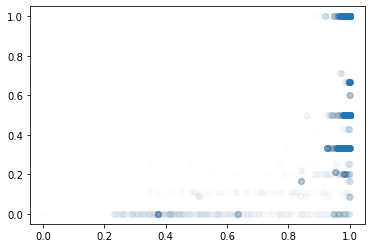

In [21]:
plt.scatter(data['geocode_coordinates_long_diff'], data[ 'geocoderpostalcodenumber_trigram_sim'], alpha=0.01)

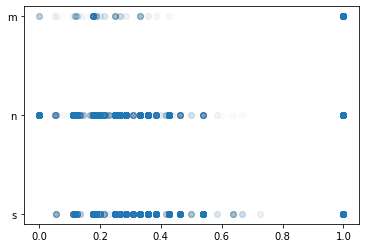

In [22]:
plt.scatter(data['geocode_coordinates_long_trigram'], data[ 'street_number_equality'], alpha=0.01)

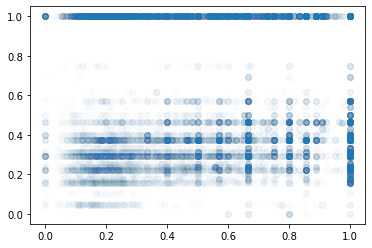

In [23]:
plt.scatter(data['clean_name_levenshtein_sim'], data[ 'geocode_coordinates_lat_trigram'], alpha=0.01)

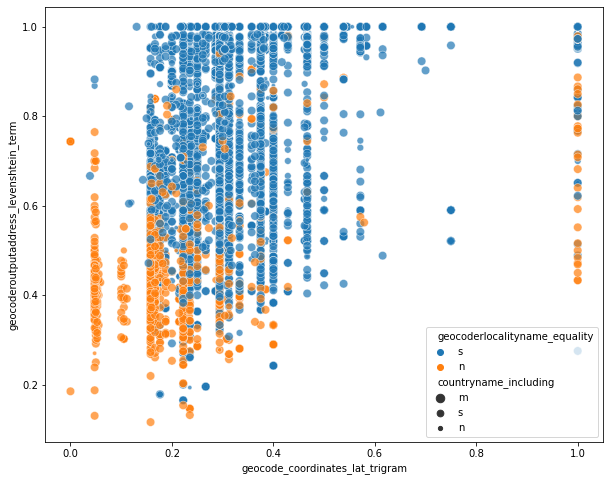

In [24]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='geocode_coordinates_lat_trigram', y='geocoderoutputaddress_levenshtein_term', size='countryname_including', hue='geocoderlocalityname_equality', data=data, alpha=0.7)
pass

Я не буду строить диаграммы рассеивания для всех признаков, их будет слишком много. Построим гистограммы

C:\Users\eglas\AppData\Local\Temp\ipykernel_17248\1024172886.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['geocoderinputaddress_levenshtein_term'], bins=15)


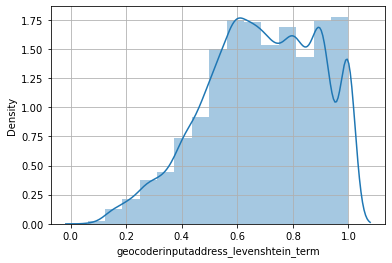

In [25]:
sns.distplot(data['geocoderinputaddress_levenshtein_term'], bins=15)
plt.grid()
pass

Диаграмма рассеивания для пары признаков и соответствующие гистограммы

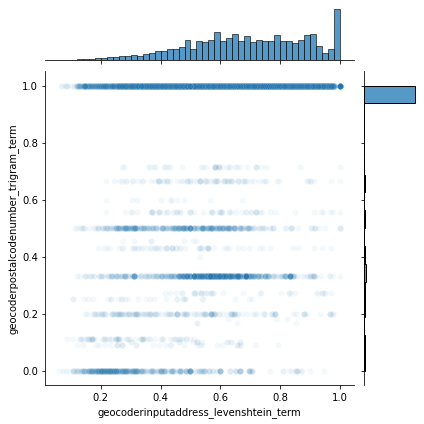

In [26]:
sns.jointplot(x='geocoderinputaddress_levenshtein_term', y='geocoderpostalcodenumber_trigram_term', alpha=.05, data=data)
pass

C:\Users\eglas\AppData\Local\Temp\ipykernel_17248\4217034533.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['geocode_coordinates_long_levenshtein'], bins = 20)


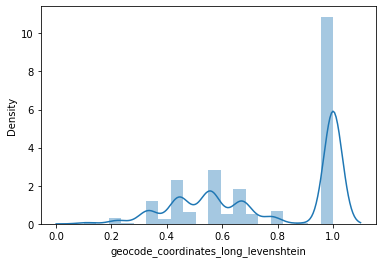

In [27]:
sns.distplot(data['geocode_coordinates_long_levenshtein'], bins = 20)
pass

C:\Users\eglas\AppData\Local\Temp\ipykernel_17248\595462806.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['geocoderlocalityname_trigram_term'], bins = 15)


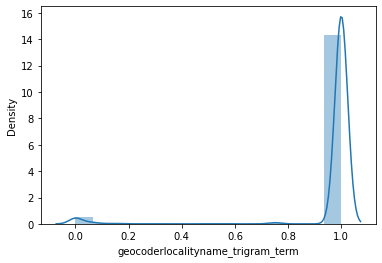

In [28]:
sns.distplot(data['geocoderlocalityname_trigram_term'], bins = 15)
pass

Ящик с усами

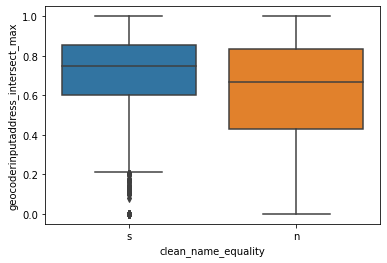

In [29]:
sns.boxplot(x="clean_name_equality", y="geocoderinputaddress_intersect_max", data=data)
pass

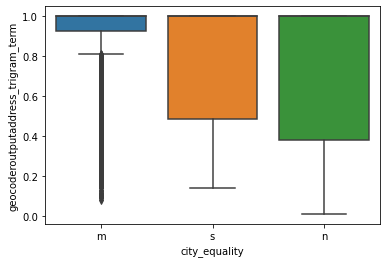

In [30]:
sns.boxplot(x="city_equality", y="geocoderoutputaddress_trigram_term", data=data)
pass

Скрипичный график

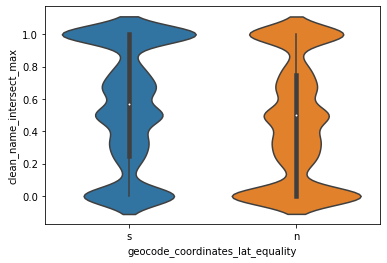

In [31]:
sns.violinplot(x="geocode_coordinates_lat_equality", y="clean_name_intersect_max", data=data)
pass

Вычислим матрицу корреляции для признаков

In [32]:
corr_mat = data.corr()
corr_mat

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,geocoderlocalityname_intersect_min,geocoderlocalityname_intersect_max,geocoderlocalityname_levenshtein_sim,geocoderlocalityname_trigram_sim,...,geocodercountrynamecode_levenshtein_term,geocodercountrynamecode_trigram_term,geocode_coordinates_long_diff,geocode_coordinates_long_levenshtein,geocode_coordinates_long_trigram,geocode_coordinates_lat_diff,geocode_coordinates_lat_levenshtein,geocode_coordinates_lat_trigram,geocode_coordinates_diff,label
clean_name_intersect_min,1.000000,0.867212,0.866414,0.919349,0.715614,0.851278,0.090987,0.095479,0.111743,0.106064,...,0.025808,0.025808,0.144462,0.195561,0.181932,0.123265,0.205395,0.186933,0.126739,0.672110
clean_name_intersect_max,0.867212,1.000000,0.971397,0.980569,0.891921,0.968101,0.076999,0.080863,0.096484,0.091905,...,0.022296,0.022296,0.125318,0.179224,0.167173,0.104783,0.183826,0.170910,0.109676,0.587569
clean_name_levenshtein_sim,0.866414,0.971397,1.000000,0.985699,0.897469,0.964768,0.087389,0.090844,0.108286,0.103401,...,0.025198,0.025198,0.139843,0.183718,0.170936,0.117124,0.189298,0.175033,0.122884,0.605577
clean_name_trigram_sim,0.919349,0.980569,0.985699,1.000000,0.879157,0.969919,0.088996,0.092802,0.109927,0.104831,...,0.024873,0.024873,0.141515,0.191418,0.178138,0.118657,0.198039,0.182448,0.123852,0.639101
clean_name_levenshtein_term,0.715614,0.891921,0.897469,0.879157,1.000000,0.925174,0.070744,0.073507,0.084508,0.081258,...,0.019697,0.019697,0.116418,0.162164,0.151454,0.098385,0.163131,0.153864,0.103337,0.496419
clean_name_trigram_term,0.851278,0.968101,0.964768,0.969919,0.925174,1.000000,0.083375,0.086902,0.100356,0.095830,...,0.022251,0.022251,0.127393,0.190507,0.178222,0.105026,0.194573,0.181334,0.109583,0.602455
geocoderlocalityname_intersect_min,0.090987,0.076999,0.087389,0.088996,0.070744,0.083375,1.000000,0.991328,0.926249,0.954805,...,0.078603,0.078603,0.611979,0.281299,0.241415,0.569425,0.284235,0.245497,0.569200,0.149150
geocoderlocalityname_intersect_max,0.095479,0.080863,0.090844,0.092802,0.073507,0.086902,0.991328,1.000000,0.934572,0.960409,...,0.077898,0.077898,0.607110,0.283441,0.244360,0.564709,0.286896,0.248646,0.564386,0.156542
geocoderlocalityname_levenshtein_sim,0.111743,0.096484,0.108286,0.109927,0.084508,0.100356,0.926249,0.934572,1.000000,0.989803,...,0.085238,0.085238,0.657850,0.298993,0.258486,0.607400,0.305670,0.263782,0.613839,0.175785
geocoderlocalityname_trigram_sim,0.106064,0.091905,0.103401,0.104831,0.081258,0.095830,0.954805,0.960409,0.989803,1.000000,...,0.085118,0.085118,0.661332,0.300746,0.259576,0.615931,0.308492,0.266285,0.616082,0.171097


Визуальный образ матрицы

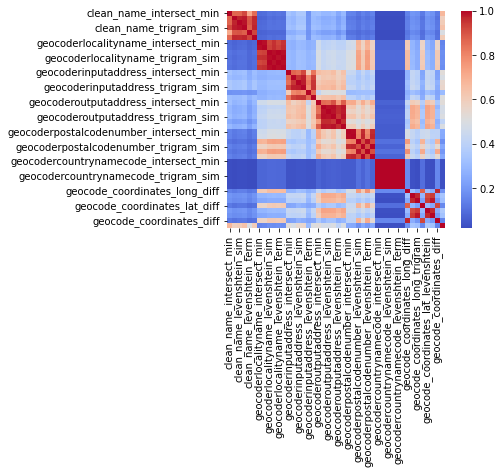

In [33]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Высокие корреляции между признаками вполне понятны, это по сути измерение похожести очень близких признаков мест

Сделаем еще одну копию

In [34]:
data_before_factorize = data.copy()

In [35]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = pd.factorize(data[column])[0]
        if len(data[column].value_counts()) > 2:
            dummies = pd.get_dummies(data[column])
            data = pd.concat((data, dummies), axis=1)
            data = data.drop([column], axis=1)

In [36]:
from random import randrange
print(data.columns[randrange(73)])

geocoderinputaddress_trigram_sim


# Нормализация количественных признаков

Для начала заменим в метках -1 на 0:

In [37]:
data['label'] = data['label'].replace(to_replace=-1, value=0)
data['label'].value_counts()

1    20865
0     7710
Name: label, dtype: int64

Посмотрим, нужна ли вообще нормализация

In [38]:
for idx in data.index:
    for elm in data.loc[idx, ]:
        if elm > 1 or elm < 0:
            print('Нужна нормализация')

Не нужна

# Разбиение данных на обучающую и тестовую выборки

In [39]:
X = data.drop(['label'], axis=1)
y = data['label']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(21431, 7144)

# kNN

Подберем лучший параметр kNN

In [41]:
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.04661484632367796 3


In [42]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.025803742242545846 0.04647256438969765


Ошибка получилась ниже, чем я ожидал. Лучше всего оказался классификатор именно ближайших 3ех соседей

# SVC

Очень долго выполняется подбор параметров, поэтому я просто присвоил найденные значения

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Cs = 10.**np.arange(-5, 5)
# gamma_array = 10.**np.arange(-5, 5)
# svc = SVC(gamma='auto')
# grid = GridSearchCV(svc, cv=3, param_grid = {'C': Cs, 'gamma': gamma_array})
# grid.fit(X_train, y_train)

# best_cv_err = 1 - grid.best_score_
# best_C = grid.best_estimator_.C
# print(best_cv_err, best_C)
best_cv_err = 0.03625583889964601
best_C = 1000

In [44]:
svc = SVC(C = best_C, gamma='auto').fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.025803742242545846 0.04647256438969765


# Random Forest

In [45]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.03177491601343785


# Extremely Randomized Trees

In [46]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.03345464725643897


# AdaBoost

In [47]:
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.04129531986374878 0.04381298992161254


# GBT

In [48]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.033502869674770196 0.040873460246360585


# Выводы:

Лучшим классификатором среди примененных оказался Random Forest. Это можно объяснить самой сущностью данных - признаки представляют из себя количественную "схожесть" двух мест по тем или иным параметрам, и интуитивно кажется, что решить подобную задачу как раз наиболее удобно несколькими условиями с подобранными значениями, что и представляет из себя "Decision tree", из которых состоит "Random Forest". При этом ошибка отличается всего на 1 процент от того же метода ближайших соседей.